<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Solved by: Davi Moreno

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Aug 25 04:24:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.8.0+cu126


'cuda'

In [3]:
# Set random seed to be used during program
RANDOM_SEED = 42

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

- Increase model size: maybe current model is too small to find patterns and learn the data.
- Transfer learning: use models pretrained in similar tasks to help with your model learning.
- Train longer: maybe your model needs to train for more epochs to show better learning results.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [4]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image foder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True,
                     exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [5]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(data_path)

There are 1 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [6]:
# Setup train and testing paths
train_path = image_path / "train"
test_path = image_path / "test"

train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Path: data/pizza_steak_sushi/train/steak/167069.jpg
Class: steak
Dimensions: 512x382


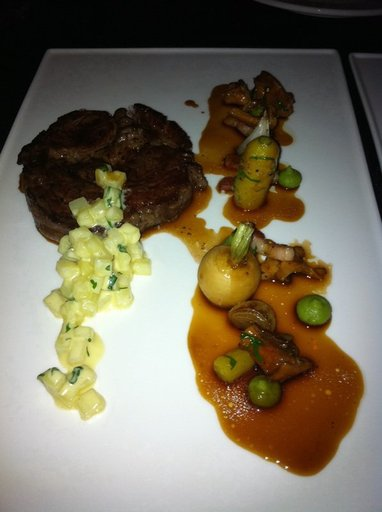

In [7]:
# Visualize an image

from PIL import Image
import random

# Set seed
random.seed(RANDOM_SEED)

# Get all train image paths
train_image_path_list = list(train_path.glob("*/*.jpg"))

# Choose random image
random_image_path = random.choice(train_image_path_list)

# Get random image class
random_image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# Plot image
print(f"Path: {random_image_path}")
print(f"Class: {random_image_class}")
print(f"Dimensions: {img.height}x{img.width}")
img

(np.float64(-0.5), np.float64(381.5), np.float64(511.5), np.float64(-0.5))

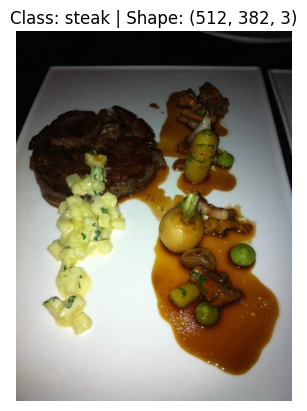

In [8]:
# Do the image visualization with matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Turn image into numpy array
img_as_array = np.asarray(img) # Notice that image is already in HWC format

# Plot image
plt.imshow(img_as_array)
plt.title(f"Class: {random_image_class} | Shape: {img_as_array.shape}")
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [9]:
# 3.1 Transforming data with torchvision.transforms

# Base libraries
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import v2 # documentation says functions in v2 are faster

In [10]:
# Write transform for turning images into tensors
train_transform = v2.Compose([
    # Resize images to be 64x64
    v2.Resize(size=(64, 64)),

    # Transform to tensor
    # Documentation recomends doing like bellow
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])

test_transform = v2.Compose([
    # Resize images to be 64x64
    v2.Resize(size=(64, 64)),

    # Transform to tensor
    # Documentation recomends doing like bellow
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])

train_transform, test_transform

(Compose(
       Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
       ToImage()
       ToDtype(scale=True)
 ),
 Compose(
       Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
       ToImage()
       ToDtype(scale=True)
 ))

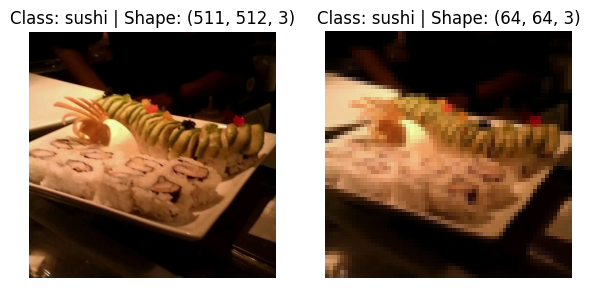

In [11]:
# Write a function to plot transformed images
def plot_tranformed_image(img_path, transform):
    # Open image
    img = Image.open(img_path)

    # Get image class
    img_class = img_path.parent.stem

    # Apply transform to image
    img_transformed = transform(img).permute((1, 2, 0)) # CHW -> HWC

    # Convert imageS to numpy arrayS
    img_as_array = np.asarray(img)
    img_transformed_as_array = img_transformed.numpy()

    # Create figure to show images
    fig = plt.figure(figsize=(7, 7))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_as_array)
    plt.title(f"Class: {img_class} | Shape: {img_as_array.shape}")
    plt.axis(False)

    # Plot transformed image
    plt.subplot(1, 2, 2)
    plt.imshow(img_transformed_as_array)
    plt.title(f"Class: {img_class} | Shape: {img_transformed_as_array.shape}")
    plt.axis(False)

random_image_path = random.choice(train_image_path_list)
plot_tranformed_image(random_image_path, train_transform)

### Load image data using `ImageFolder`

In [12]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root=train_path,
                         transform=train_transform)

test_data = ImageFolder(root=test_path,
                        transform=test_transform)

In [13]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [16]:
# Turn train and test Datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Get number of available CPUs
num_cpu = os.cpu_count()

# Create DataLoaders
BATCH_SIZE = 8

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=num_cpu)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=num_cpu)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bca43b75190>,
 <torch.utils.data.dataloader.DataLoader at 0x7bca43d3e330>)

In [17]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(29, 10)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [18]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        # Each block above reduces its input image width and length by half.
        # The images in dataset are 64x64, so the input of this layer will have
        # dimension hidden_units x (64/4) x (64/4), where the hidden units
        # represents the number of output channels of the previous layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.block_2(self.block_1(x)))

## 4. Create training and testing functions for `model_0`.

In [19]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):

    # Send model to device
    model.to(device)

    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for (X, y) in dataloader:

        # Send data to target device
        X = X.to(device)
        y = y.to(device)

        # 1. Forward pass
        y_logits = model(X)

        # 2. Calculate and accumulate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()


        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumualte accuracy metric
        train_acc += (y_logits.argmax(dim=1) == y).sum().item()

    # Adjust metrics to get average loss and average accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader.dataset)

    return train_loss, train_acc

In [20]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):

    # Send model to device
    model.to(device)

    # Put model in eval mode
    model.eval()

    # Setup the test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for (X,y) in dataloader:
            # Send data to target device
            X = X.to(device)
            y = y.to(device)

            # 1. Forward pass
            y_logits = model(X)

            # 2. Calculuate and accumulate loss
            loss = loss_fn(y_logits, y)
            test_loss += loss

            # Calculate and accumulate accuracy
            test_acc += (y_logits.argmax(dim=1) == y).sum().item()

        # Adjust metrics to get average loss and accuracy per batch
        test_loss /= len(dataloader)
        test_acc /= len(dataloader.dataset)

        return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          device: torch.device,
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [22]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create model
model0 = TinyVGG(input_shape=3, # 3 channels
                 hidden_units=10,
                 output_shape=3) # 3 output classes

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

result_5_epochs = train(model0,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn,
                        device,
                        epochs = 5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1118 | train_acc: 0.2711 | test_loss: 1.1189 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0989 | train_acc: 0.3333 | test_loss: 1.1051 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.1004 | train_acc: 0.3244 | test_loss: 1.1029 | test_acc: 0.3467
Epoch: 4 | train_loss: 1.0832 | train_acc: 0.4578 | test_loss: 1.0878 | test_acc: 0.3600
Epoch: 5 | train_loss: 0.9922 | train_acc: 0.4844 | test_loss: 1.0970 | test_acc: 0.3867


In [23]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create model
model1 = TinyVGG(input_shape=3, # 3 channels
                 hidden_units=10,
                 output_shape=3) # 3 output classes

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(),
                             lr=0.001)

result_20_epochs = train(model1,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn,
                        device,
                        epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1118 | train_acc: 0.2711 | test_loss: 1.1188 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.3289 | test_loss: 1.1059 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.1009 | train_acc: 0.3067 | test_loss: 1.1032 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0896 | train_acc: 0.4489 | test_loss: 1.0930 | test_acc: 0.3600
Epoch: 5 | train_loss: 1.0053 | train_acc: 0.5022 | test_loss: 1.1096 | test_acc: 0.3733
Epoch: 6 | train_loss: 0.9828 | train_acc: 0.5289 | test_loss: 1.0390 | test_acc: 0.4667
Epoch: 7 | train_loss: 0.8871 | train_acc: 0.6133 | test_loss: 1.0118 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7980 | train_acc: 0.6444 | test_loss: 0.9952 | test_acc: 0.4800
Epoch: 9 | train_loss: 0.7696 | train_acc: 0.6711 | test_loss: 1.0692 | test_acc: 0.5200
Epoch: 10 | train_loss: 0.7598 | train_acc: 0.6578 | test_loss: 1.0290 | test_acc: 0.5200
Epoch: 11 | train_loss: 0.7436 | train_acc: 0.6311 | test_loss: 1.0876 | test_acc: 0.4533
Epoch: 12 | train_l

In [24]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create model
model2 = TinyVGG(input_shape=3, # 3 channels
                 hidden_units=10,
                 output_shape=3) # 3 output classes

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(),
                             lr=0.001)

result_50_epochs = train(model2,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        loss_fn,
                        device,
                        epochs = 50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1118 | train_acc: 0.2711 | test_loss: 1.1189 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1040 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0980 | train_acc: 0.3200 | test_loss: 1.0906 | test_acc: 0.4000
Epoch: 4 | train_loss: 0.9838 | train_acc: 0.5289 | test_loss: 1.0694 | test_acc: 0.3867
Epoch: 5 | train_loss: 0.9115 | train_acc: 0.5600 | test_loss: 1.0147 | test_acc: 0.4400
Epoch: 6 | train_loss: 0.8593 | train_acc: 0.5911 | test_loss: 1.1811 | test_acc: 0.4267
Epoch: 7 | train_loss: 0.8546 | train_acc: 0.6222 | test_loss: 1.0266 | test_acc: 0.4933
Epoch: 8 | train_loss: 0.7580 | train_acc: 0.6622 | test_loss: 1.0032 | test_acc: 0.4533
Epoch: 9 | train_loss: 0.7547 | train_acc: 0.6800 | test_loss: 1.0216 | test_acc: 0.5200
Epoch: 10 | train_loss: 0.7469 | train_acc: 0.6489 | test_loss: 1.0352 | test_acc: 0.4667
Epoch: 11 | train_loss: 0.7176 | train_acc: 0.6800 | test_loss: 1.0829 | test_acc: 0.4800
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [25]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create model
model3 = TinyVGG(input_shape=3, # 3 channels
                 hidden_units=20, # Doubled
                 output_shape=3) # 3 output classes

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(),
                             lr=0.001)

result_20_epochs_doubled_hidden = train(model3,
                                    train_dataloader,
                                    test_dataloader,
                                    optimizer,
                                    loss_fn,
                                    device,
                                    epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1031 | train_acc: 0.3644 | test_loss: 1.0801 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0732 | train_acc: 0.4311 | test_loss: 1.0690 | test_acc: 0.3867
Epoch: 3 | train_loss: 0.9678 | train_acc: 0.5511 | test_loss: 0.9952 | test_acc: 0.4400
Epoch: 4 | train_loss: 0.9310 | train_acc: 0.6356 | test_loss: 1.0325 | test_acc: 0.4667
Epoch: 5 | train_loss: 0.9874 | train_acc: 0.5422 | test_loss: 1.0160 | test_acc: 0.4800
Epoch: 6 | train_loss: 0.9412 | train_acc: 0.5556 | test_loss: 1.0147 | test_acc: 0.4533
Epoch: 7 | train_loss: 0.8212 | train_acc: 0.6578 | test_loss: 1.0424 | test_acc: 0.5200
Epoch: 8 | train_loss: 0.7705 | train_acc: 0.6489 | test_loss: 0.9989 | test_acc: 0.4933
Epoch: 9 | train_loss: 0.7791 | train_acc: 0.6667 | test_loss: 1.0411 | test_acc: 0.5200
Epoch: 10 | train_loss: 0.6936 | train_acc: 0.7289 | test_loss: 1.1653 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.6350 | train_acc: 0.7200 | test_loss: 1.1684 | test_acc: 0.4667
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [26]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [27]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.


Excellent, we now have double the training and testing images...

In [28]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [29]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data = ImageFolder(root=train_data_20_percent_path,
                         transform=simple_transform)
test_data = ImageFolder(root=test_data_20_percent_path,
                         transform=simple_transform)

# Create dataloaders
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=num_cpu)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=num_cpu)

In [30]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create model
model4 = TinyVGG(input_shape=3, # 3 channels
                 hidden_units=10,
                 output_shape=3) # 3 output classes

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(),
                             lr=0.001)

result_20_epochs_extended_dataset = train(model4,
                                        train_dataloader,
                                        test_dataloader,
                                        optimizer,
                                        loss_fn,
                                        device,
                                        epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1166 | train_acc: 0.3022 | test_loss: 1.0983 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.0994 | train_acc: 0.3244 | test_loss: 1.0981 | test_acc: 0.3133
Epoch: 3 | train_loss: 1.0974 | train_acc: 0.3978 | test_loss: 1.0924 | test_acc: 0.4800
Epoch: 4 | train_loss: 1.0773 | train_acc: 0.4911 | test_loss: 1.0224 | test_acc: 0.6000
Epoch: 5 | train_loss: 0.9543 | train_acc: 0.5244 | test_loss: 0.9031 | test_acc: 0.5600
Epoch: 6 | train_loss: 0.8914 | train_acc: 0.5556 | test_loss: 0.8915 | test_acc: 0.6333
Epoch: 7 | train_loss: 0.8462 | train_acc: 0.6289 | test_loss: 0.9001 | test_acc: 0.5667
Epoch: 8 | train_loss: 0.8496 | train_acc: 0.6089 | test_loss: 0.8848 | test_acc: 0.5600
Epoch: 9 | train_loss: 0.7940 | train_acc: 0.6711 | test_loss: 0.8884 | test_acc: 0.5400
Epoch: 10 | train_loss: 0.7626 | train_acc: 0.6867 | test_loss: 0.8908 | test_acc: 0.5667
Epoch: 11 | train_loss: 0.7368 | train_acc: 0.6867 | test_loss: 0.9442 | test_acc: 0.5667
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
- Does the model you trained in exercise 7 get it right?
    - The prediction was wrong. I loaded a sushi image and it predicted a pizza.
    - The model achive better results (e.g. over 60% test accuracy at some point) than previous models, but it is still bad.
- If not, what do you think you could do to improve it?
    - We could attempt adding some data augmentation to our training transform. The current transform just performs a resize and convert the image to a tensor.

In [31]:
# Download my custom image
import requests

# Setup custom image path
custom_image_link = "https://raw.githubusercontent.com/davimoreno/pytorch_exercises/main/others/04_pytorch_custom_datasets_exercises_my_sushi_image.jpg"
custom_image_path = data_path / "04-my-sushi.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get(custom_image_link)
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

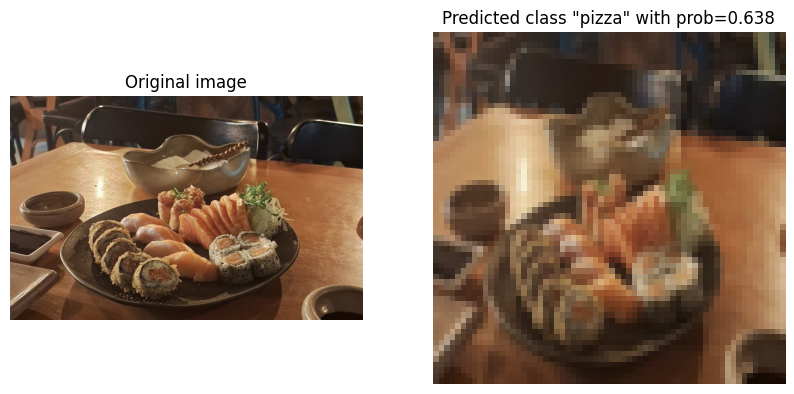

In [32]:
# 1. Load image
img = Image.open(custom_image_path)

# 2. Transform image
img_transformed = simple_transform(img).to(device)

# 3. Send model to device
model4.to(device)

# 4. Forward
y_logits = model4(img_transformed.unsqueeze(dim=0)).cpu()

# 5. Get prediction probs
y_probs = torch.softmax(y_logits, dim=1)

# 6. Get prediction class
y_pred = y_logits.argmax(dim=1)
y_class = class_names[y_pred]
y_class_prob = y_probs[:, y_pred].item()

# 7. Plot original and transformed image with predicted class and prob
fig = plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original image")
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(img_transformed.cpu().permute(1, 2, 0))
plt.title(f"Predicted class \"{y_class}\" with prob={y_class_prob:.3f}")
plt.axis(False)